In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)

##General ordinary Differential Equation

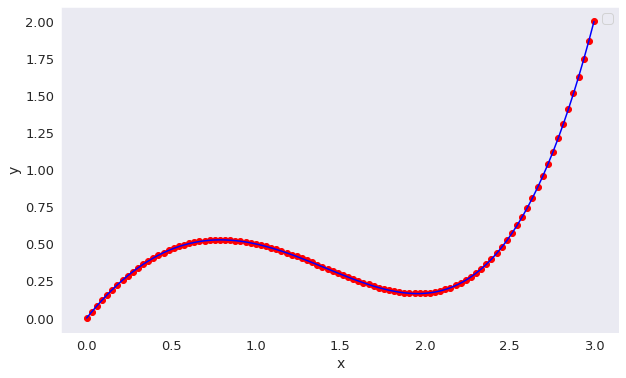

In [ ]:
import torch.nn as nn
import torch
import numpy as np
#########
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
########

input_size = 1
hidden_size1 =10
hidden_size2 =10
output_size = 1
#################

N2 = nn.Sequential(
    nn.Linear(input_size, hidden_size1),
    nn.Tanh(),
    nn.Linear(hidden_size1, hidden_size2),
    nn.Tanh(),
    nn.Linear(hidden_size2, output_size)
)
##############   
N2 = N2.to(device)
##################
def f(x):
    return x**2-2
##########
def loss(x):
    x.requires_grad = True
    y = N2(x)
    dy_dx = torch.autograd.grad(y.sum(), x, create_graph=True)[0]
    y_double_prime = torch.autograd.grad(dy_dx.sum(), x, create_graph=True)[0]
    
    return torch.mean( (y_double_prime - f(x))**2  + (y[0, 0] - 0)**2 + (y[-1, 0] -2)**2)

###################
optimizer = torch.optim.LBFGS(N2.parameters())
###################
x = torch.linspace(0, 3, 100)[:, None]
#################
def closure():
    optimizer.zero_grad()
    l = loss(x)
    l.backward()

    return l
####################
epochs = 10
for i in range(epochs):
    optimizer.step(closure)
#####################
xx = torch.linspace(0, 3, 100)[:, None]
with torch.no_grad():
    yy = N2(xx)
######################
pred=(xx**4/12)-(xx**2)+(51/36)*xx
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(xx, yy,c='blue')
plt.scatter(xx, pred,c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()
#####################

## Bar problem 

cost function: 1.2831311
cost function: 0.00014100877
cost function: 3.6496098e-05
cost function: 2.8584775e-05
cost function: 2.2952618e-05
cost function: 1.8135122e-05
cost function: 1.4233439e-05
cost function: 1.1212944e-05
cost function: 8.9586265e-06
cost function: 7.325072e-06


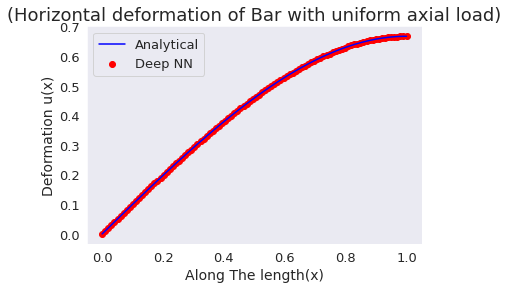

In [ ]:
import torch.nn as nn
import torch
import numpy as np

input_size = 1
hidden_size1 =15
hidden_size2 =10

output_size = 1

N2 = nn.Sequential(
    nn.Linear(input_size, hidden_size1),
    nn.Tanh(),
    nn.Linear(hidden_size1, hidden_size2),
    nn.Tanh(),
    nn.Linear(hidden_size2, output_size)
)



device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


N2 = N2.to(device)
def f(x):
    return -2*x

def loss(x):
    x.requires_grad = True
    y = N2(x)
    dy_1 = torch.autograd.grad(y.sum(), x, create_graph=True)[0]
    dy_2 = torch.autograd.grad(dy_1.sum(), x, create_graph=True)[0]
    dy_3 = torch.autograd.grad(dy_2.sum(), x, create_graph=True)[0]
    dy_4 = torch.autograd.grad(dy_3.sum(), x, create_graph=True)[0]
    ans= torch.mean( (dy_2-f(x))**2  + (y[0, 0] - 0)**2 +(dy_1[-1, 0] - 0)**2 )
    return ans
optimizer = torch.optim.Adam(N2.parameters(),lr=0.01)

x = torch.linspace(0, 1, 100)[:, None]

def closure():
    optimizer.zero_grad()
    l = loss(x)
    l.backward()

    return l

epochs = 1000
for i in range(epochs):
    optimizer.step(closure)
    if(i%100==0):
        print('cost function:',loss(x).detach().numpy())


xx = torch.linspace(0, 1, 100)[:, None]
with torch.no_grad():
    yy = N2(xx)
true_y=(-xx**3/3)+(xx)

import matplotlib.pyplot as plt
plt.title('(Horizontal deformation of Bar with uniform axial load)')
plt.plot(xx, true_y,c='blue')
plt.scatter(xx, yy,c='red')
plt.xlabel('Along The length(x)')
plt.ylabel('Deformation u(x)')
plt.legend(['Analytical','Deep NN'])
plt.grid()
plt.show()

## Simply Supported Beam

cost function: 0.11315153
cost function: 5.8595968e-05
cost function: 1.798101e-05
cost function: 1.3179195e-05
cost function: 1.1524704e-05
cost function: 9.972486e-06
cost function: 8.4971725e-06
cost function: 7.1288996e-06
cost function: 5.8914366e-06
cost function: 4.804797e-06
cost function: 3.884096e-06
cost function: 3.134185e-06
cost function: 2.5439076e-06
cost function: 2.0869763e-06
cost function: 1.7313474e-06
cost function: 1.4499607e-06
cost function: 1.224635e-06
cost function: 1.0438849e-06
cost function: 8.992624e-07
cost function: 7.8346187e-07


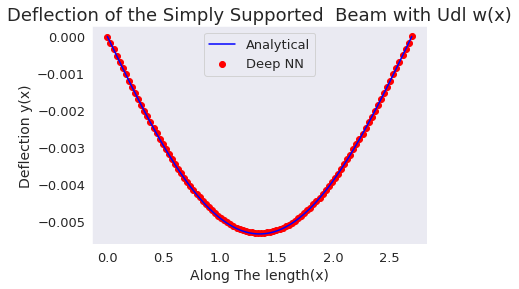

In [ ]:
import torch.nn as nn
import torch
import numpy as np

input_size = 1
hidden_size1 =50
hidden_size2 =20

output_size = 1

N2 = nn.Sequential(
    nn.Linear(input_size, hidden_size1),
    nn.Tanh(),
    nn.Linear(hidden_size1, hidden_size2),
    nn.Tanh(),
    nn.Linear(hidden_size2, output_size)
)



device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

w=60000
l=2.7
I=0.000038929334
E=200*10**9

N2 = N2.to(device)
def f(x):
    return -w/(E*I)

def loss(x):
    x.requires_grad = True
    y = N2(x)
    dy_1 = torch.autograd.grad(y.sum(), x, create_graph=True)[0]
    dy_2 = torch.autograd.grad(dy_1.sum(), x, create_graph=True)[0]
    dy_3 = torch.autograd.grad(dy_2.sum(), x, create_graph=True)[0]
    dy_4 = torch.autograd.grad(dy_3.sum(), x, create_graph=True)[0]
    
    return torch.mean( (dy_4-f(x))**2  + (y[0, 0] - 0)**2 +(y[-1, 0] - 0)**2+(dy_2[0, 0] - 0)**2+(dy_2[-1, 0] - 0)**2 )
optimizer = torch.optim.Adam(N2.parameters(),lr=0.01)

x = torch.linspace(0, l, 100)[:, None]

def closure():
    optimizer.zero_grad()
    l = loss(x)
    l.backward()
    return l

epochs = 2000
for i in range(epochs):
    optimizer.step(closure)
    if(i%100==0):
        print('cost function:',loss(x).detach().numpy())


xx = torch.linspace(0, l, 100)[:, None]
with torch.no_grad():
    yy = N2(xx)

true_y= (w/(24*E*I))*(-xx**4+2*l*xx**3-l**3*xx)

import matplotlib.pyplot as plt
plt.title('Deflection of the Simply Supported  Beam with Udl w(x)')
plt.plot(xx, true_y,c='blue')
plt.scatter(xx, yy,c='red')
plt.xlabel('Along The length(x)')
plt.ylabel('Deflection y(x)')
plt.legend(['Analytical','Deep NN'])
plt.grid()
plt.show()


## 3.Cantiliver Beam

cost function: 3.3361132
cost function: 2.9507677e-05
cost function: 9.104272e-06
cost function: 5.9727004e-06
cost function: 4.151683e-06
cost function: 2.9180433e-06
cost function: 2.0097098e-06
cost function: 1.3608984e-06
cost function: 9.107253e-07
cost function: 6.0301375e-07
cost function: 3.9610168e-07
cost function: 2.6265613e-07
cost function: 1.8196734e-07
cost function: 1.3621249e-07
cost function: 1.111482e-07
cost function: 9.703665e-08
cost function: 8.823358e-08
cost function: 8.19215e-08
cost function: 7.685591e-08
cost function: 7.250928e-08
cost function: 6.86563e-08
cost function: 6.517569e-08
cost function: 6.1994825e-08
cost function: 5.9059726e-08
cost function: 5.6328254e-08
cost function: 5.3758004e-08
cost function: 5.132987e-08
cost function: 4.9029126e-08
cost function: 1.0376954e-05
cost function: 7.7529315e-08


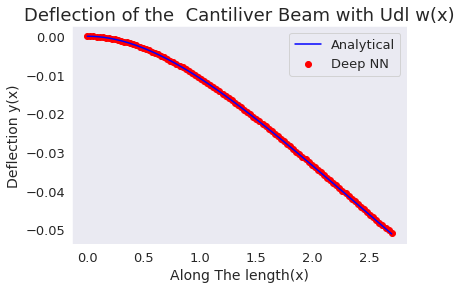

In [ ]:
import torch.nn as nn
import torch
import numpy as np

input_size = 1
hidden_size1 =100
hidden_size2 =100

output_size = 1

N2 = nn.Sequential(
    nn.Linear(input_size, hidden_size1),
    nn.Tanh(),
    nn.Linear(hidden_size1, hidden_size2),
    nn.Tanh(),
    nn.Linear(hidden_size2, output_size)
)



device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

w=60000
l=2.7
I=0.000038929334
E=200*10**9

N2 = N2.to(device)
def f(x):
    return -w/(E*I)

def loss(x):
    x.requires_grad = True
    y = N2(x)
    dy_1 = torch.autograd.grad(y.sum(), x, create_graph=True)[0]
    dy_2 = torch.autograd.grad(dy_1.sum(), x, create_graph=True)[0]
    dy_3 = torch.autograd.grad(dy_2.sum(), x, create_graph=True)[0]
    dy_4 = torch.autograd.grad(dy_3.sum(), x, create_graph=True)[0]
    ans=torch.mean( (dy_4-f(x))**2  + (y[0, 0] - 0)**2 +(dy_1[0, 0] - 0)**2+(dy_2[-1, 0] - 0)**2+(dy_3[-1, 0] - 0)**2 )
    return ans
optimizer = torch.optim.Adam(N2.parameters(),lr=0.01)

x = torch.linspace(0, l, 100)[:, None]

def closure():
    optimizer.zero_grad()
    l = loss(x)
    l.backward()
    return l

epochs = 3000
for i in range(epochs):
    optimizer.step(closure)
    if(i%100==0):
        print('cost function:',loss(x).detach().numpy())


xx = torch.linspace(0, l, 100)[:, None]
with torch.no_grad():
    yy = N2(xx)

true_y= (w/(24*E*I))*(-xx**4+4*l*xx**3-6*xx**2*l**2)

import matplotlib.pyplot as plt
plt.title('Deflection of the  Cantiliver Beam with Udl w(x)')
plt.plot(xx, true_y,c='blue')
plt.scatter(xx, yy,c='red')
plt.xlabel('Along The length(x)')
plt.ylabel('Deflection y(x)')
plt.legend(['Analytical','Deep NN'])
plt.grid()
plt.show()


##4.Deflection of the Proped Cantiliver beam

cost function: 9.121666
cost function: 3.1421256e-05
cost function: 1.7544797e-06
cost function: 1.1310042e-06
cost function: 8.9663877e-07
cost function: 7.311703e-07
cost function: 6.062274e-07
cost function: 5.093245e-07
cost function: 4.324686e-07
cost function: 3.6989167e-07
cost function: 3.1751281e-07
cost function: 2.7276454e-07
cost function: 2.3399984e-07
cost function: 2.0021865e-07
cost function: 1.7079395e-07
cost function: 1.4524873e-07
cost function: 1.232341e-07
cost function: 1.0440743e-07
cost function: 8.845399e-08
cost function: 7.50747e-08
cost function: 6.396401e-08
cost function: 5.484016e-08
cost function: 1.1934312e-05
cost function: 4.0758124e-08
cost function: 3.4996262e-08
cost function: 3.328954e-08
cost function: 3.166101e-08
cost function: 3.009685e-08
cost function: 0.01783182
cost function: 2.888031e-07


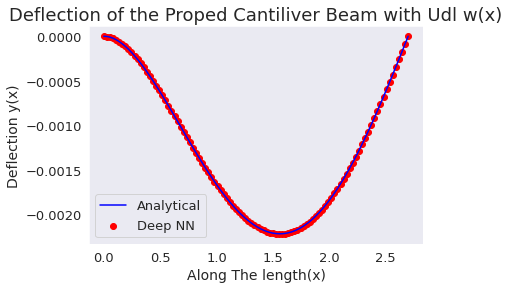

In [ ]:
import torch.nn as nn
import torch
import numpy as np

input_size = 1
hidden_size1 =100
hidden_size2 =100

output_size = 1

N2 = nn.Sequential(
    nn.Linear(input_size, hidden_size1),
    nn.Tanh(),
    nn.Linear(hidden_size1, hidden_size2),
    nn.Tanh(),
    nn.Linear(hidden_size2, output_size)
)



device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

w=60000
l=2.7
I=0.000038929334
E=200*10**9

N2 = N2.to(device)
def f(x):
    return -w/(E*I)

def loss(x):
    x.requires_grad = True
    y = N2(x)
    dy_1 = torch.autograd.grad(y.sum(), x, create_graph=True)[0]
    dy_2 = torch.autograd.grad(dy_1.sum(), x, create_graph=True)[0]
    dy_3 = torch.autograd.grad(dy_2.sum(), x, create_graph=True)[0]
    dy_4 = torch.autograd.grad(dy_3.sum(), x, create_graph=True)[0]
    ans=torch.mean( (dy_4-f(x))**2  + (y[0, 0] - 0)**2 +(dy_1[0, 0] - 0)**2+(dy_2[-1, 0] - 0)**2+(y[-1, 0] - 0)**2 )
    return ans
optimizer = torch.optim.Adam(N2.parameters(),lr=0.01)

x = torch.linspace(0, l, 100)[:, None]

def closure():
    optimizer.zero_grad()
    l = loss(x)
    l.backward()
    return l

epochs = 3000
for i in range(epochs):
    optimizer.step(closure)
    if(i%100==0):
        print('cost function:',loss(x).detach().numpy())


xx = torch.linspace(0, l, 100)[:, None]
with torch.no_grad():
    yy = N2(xx)

true_y= (w/(24*E*I))*(-xx**4+2.5*l*xx**3-1.5*xx**2*l**2)

import matplotlib.pyplot as plt
plt.title('Deflection of the Proped Cantiliver Beam with Udl w(x)')
plt.plot(xx, true_y,c='blue')
plt.scatter(xx, yy,c='red')
plt.xlabel('Along The length(x)')
plt.ylabel('Deflection y(x)')
plt.legend(['Analytical','Deep NN'])
plt.grid()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
plt.title('Deflection of the Proped Cantiliver Beam with Udl w(x)')
plt.plot(xx, true_y,c='blue')
plt.scatter(xx, yy,c='red')
plt.xlabel('Along The length(x)')
plt.ylabel('Deflection y(x)')
plt.legend(['Analytical','Deep NN'])
plt.grid()
plt.show()